In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-87ba16af69f5>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

base_rates_old = {'US': [5.71e-5, 1.18e-5, 8.82e-4, 3.38e-5, 4.43e-6]}

base_rates={'US': [ 0.00030337421446090766, 0.0002161342156809927, 0.00538478625440077, 0.00047969690430090407, 2.0409187578669242e-05],
            
# past (before jan18): [4.75e-05, 1.37e-5, 2.56e-3, 2.5e-5, 7.62e-6],
# past (before Jan14) values
#[5.97e-5, 3.03e-5,8.82e-4, 6.19e-5, 6.65e-6 ],
#past past values
#6.91e-05,
#1.18e-05,
#2.28e-03,
#3.51e-05,
#5.44e-06],
'MX': [2.73e-05, 1.11e-05, 1.77e-04, 8.36e-06, 1.64e-06],
'BR': [7.52e-06, 1.51e-05, 1.43e-04, 2.86e-05, 3.6e-06]}

N_random={'US':100002226, 'MX': 99998628, 'BR': 99984967 }


# base_ranks=[int(x*N_random) for x in base_rates]
# label2rank=dict(zip(labels,base_ranks))

In [3]:
8.82e-4*100002226

88201.963332

## US

In [12]:
country_code='US'
model_folder = 'convbert_dec'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
label2rank

{'is_hired_1mo': 30338,
 'is_unemployed': 21613,
 'job_offer': 538490,
 'job_search': 47970,
 'lost_job_1mo': 2040}

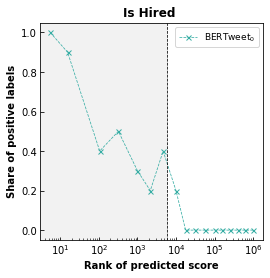

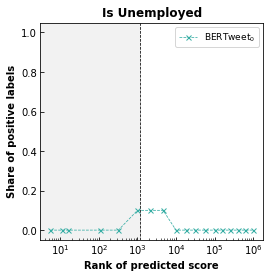

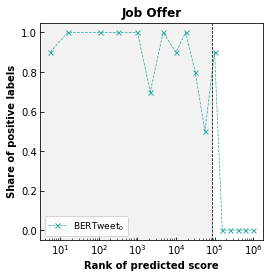

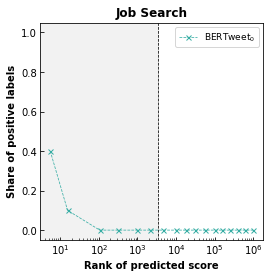

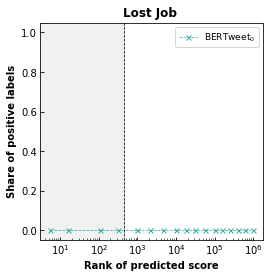

In [10]:
country_code='US'
model_folder = 'convbert_dec'
base_ranks=[int(x*N_random[country_code]) for x in base_rates_old[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight')

### ConvBERT

In [11]:
color_dict = {0:'darkgreen', 1: 'darkblue', 2:'maroon', 
              3:'red', 4:'gold', 5: 'lime', 6: 'aqua', 7: 'palegoldenrod', 8: 'fuchsia'}

In [12]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

is_hired_1mo
0
1
2
3
4
5
6
7
8
is_unemployed
0
1
2
3
4
5
6
7
8
job_offer
0
1
2
3
4
5
6
7
8
job_search
0
1
2
3
4
5
6
7
8
lost_job_1mo
0
1
2
3
4
5
6
7
8


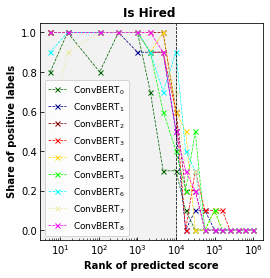

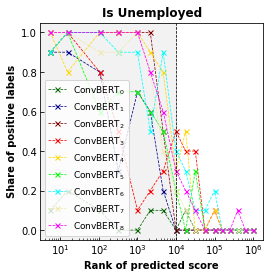

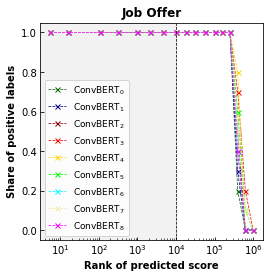

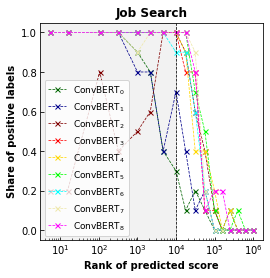

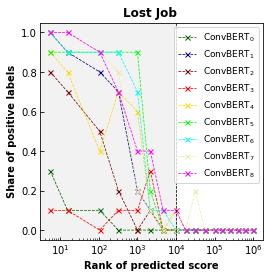

In [13]:
country_code='US'
model_folder_dict = {'iteration_0': 'iter_0-convbert-969622-evaluation',
                     'iteration_1': 'iter_1-convbert-3050798-evaluation',
                     'iteration_2': 'iter_2-convbert-3134867-evaluation',
                     'iteration_3': 'iter_3-convbert-3174249-evaluation',
                     'iteration_4': 'iter_4-convbert-3297962-evaluation',
                     'iteration_5': 'iter_5-convbert-6746181-evaluation',
                     'iteration_6': 'iter_6-convbert-7369047-evaluation',
                     'iteration_7': 'iter_7-convbert-8801193-evaluation',
                     'iteration_8': 'iter_8-convbert-8859378-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    print(label)
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(9):
        print(iteration)
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data, encoding= 'unicode_escape')
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=color_dict[iteration],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'ConvBERT$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

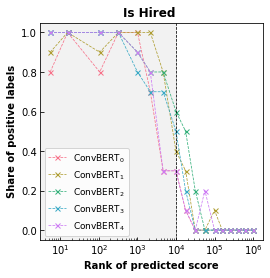

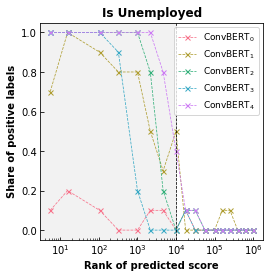

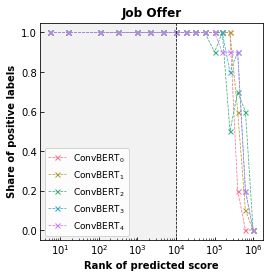

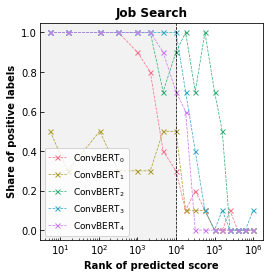

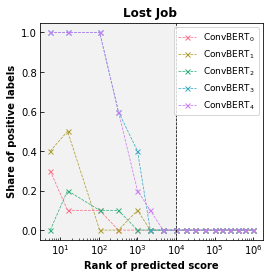

In [3]:
country_code='US'
model_folder_dict = {'iteration_0': 'iter_0-convbert-969622-evaluation',
                     'iteration_1': 'iter_1-convbert_adaptive-5612019-evaluation',
                     'iteration_2': 'iter_2-convbert_adaptive-5972342-evaluation',
                     'iteration_3': 'iter_3-convbert_adaptive-5998181-evaluation',
                     'iteration_4': 'iter_4-convbert_adaptive-6057405-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(5):
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[iteration],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'ConvBERT$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

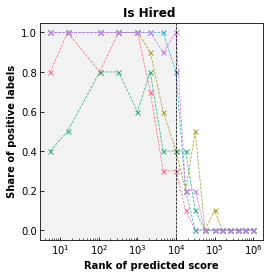

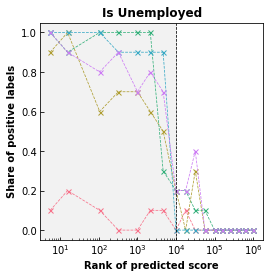

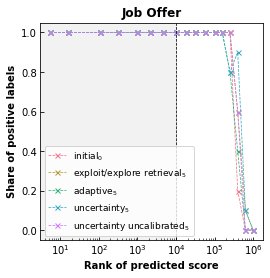

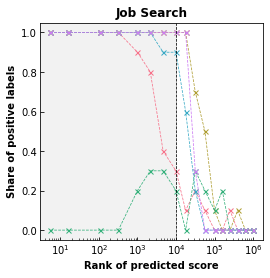

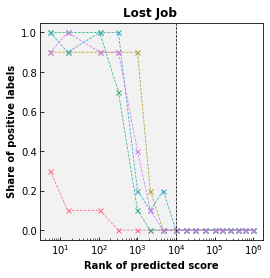

In [5]:
country_code='US'
model_folder_dict = { 'initial': {'iteration_0': 'iter_0-convbert-969622-evaluation'},
                    'exploit/explore retrieval': {
                     'iteration_5': 'iter_5-convbert-6746181-evaluation'},
                    'adaptive': {'iteration_5': 'iter_5-convbert_adaptive-6742239-evaluation'},
                    'uncertainty': {'iteration_5': 'iter_5-convbert_uncertainty-6737138-evaluation'},
                    'uncertainty uncalibrated': {'iteration_5': 'iter_5-convbert_uncertainty_uncalibrated-6740028-evaluation'}}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for num, method in enumerate(['initial','exploit/explore retrieval', 'adaptive', 'uncertainty', 'uncertainty uncalibrated']):
        if method == 'initial':
            iteration=0
        else:
            iteration = 5
        model_folder = model_folder_dict[method][f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[num],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'{method}$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    if label == 'job_offer':
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

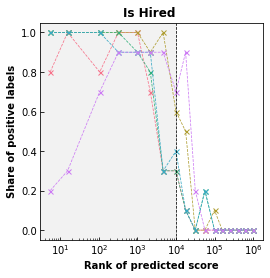

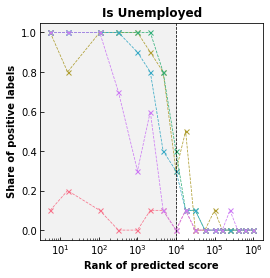

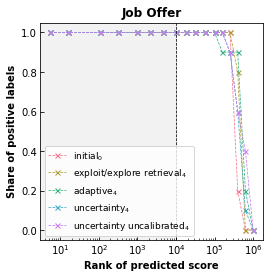

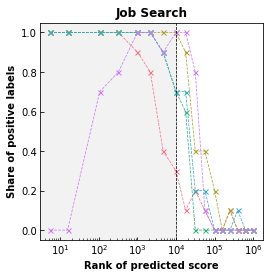

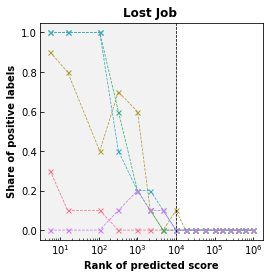

In [3]:
country_code='US'
model_folder_dict = { 'initial': {'iteration_0': 'iter_0-convbert-969622-evaluation'},
                    'exploit/explore retrieval': {
                     'iteration_4': 'iter_4-convbert-3297962-evaluation'},
                    'adaptive': {'iteration_4': 'iter_4-convbert_adaptive-6057405-evaluation'},
                    'uncertainty': {'iteration_4': 'iter_4-convbert_uncertainty-6423646-evaluation'},
                    'uncertainty uncalibrated': {'iteration_4': 'iter_4-convbert_uncertainty_uncalibrated-6653849-evaluation'}}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for num, method in enumerate(['initial','exploit/explore retrieval', 'adaptive', 'uncertainty', 'uncertainty uncalibrated']):
        if method == 'initial':
            iteration=0
        else:
            iteration = 4
        model_folder = model_folder_dict[method][f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[num],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'{method}$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    if label == 'job_offer':
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

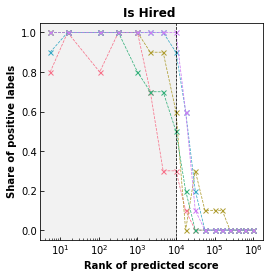

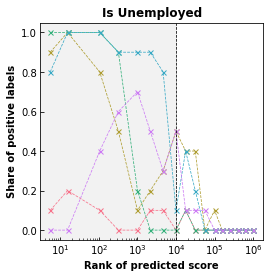

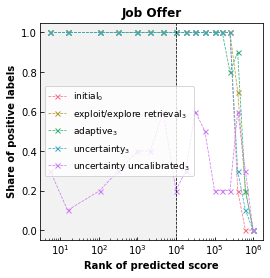

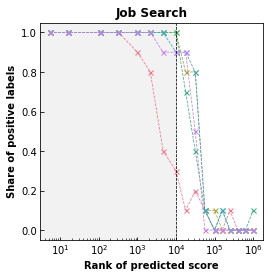

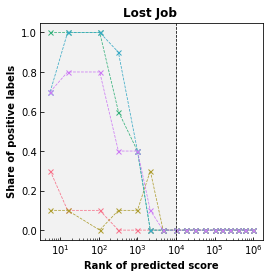

In [4]:
country_code='US'
model_folder_dict = { 'initial': {'iteration_0': 'iter_0-convbert-969622-evaluation'},
                    'exploit/explore retrieval': {
                     'iteration_3': 'iter_3-convbert-3174249-evaluation'},
                    'adaptive': {'iteration_3': 'iter_3-convbert_adaptive-5998181-evaluation'},
                    'uncertainty': {'iteration_3': 'iter_3-convbert_uncertainty-6318280-evaluation'},
                    'uncertainty uncalibrated': {'iteration_3': 'iter_3-convbert_uncertainty_uncalibrated-6596620-evaluation'}}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for num, method in enumerate(['initial','exploit/explore retrieval', 'adaptive', 'uncertainty', 'uncertainty uncalibrated']):
        if method == 'initial':
            iteration=0
        else:
            iteration = 3
        model_folder = model_folder_dict[method][f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[num],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'{method}$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    if label == 'job_offer':
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

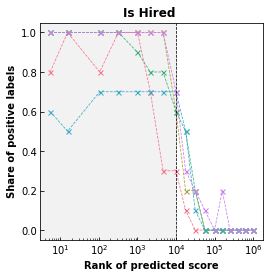

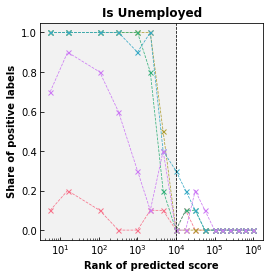

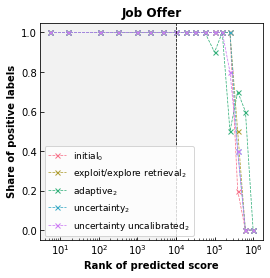

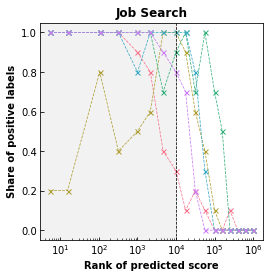

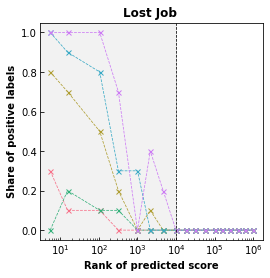

In [5]:
country_code='US'
model_folder_dict = { 'initial': {'iteration_0': 'iter_0-convbert-969622-evaluation'},
                    'exploit/explore retrieval': {
                     'iteration_2': 'iter_2-convbert-3134867-evaluation'},
                    'adaptive': {'iteration_2': 'iter_2-convbert_adaptive-5972342-evaluation'},
                    'uncertainty': {'iteration_2': 'iter_2-convbert_uncertainty-6253253-evaluation'},
                    'uncertainty uncalibrated': {'iteration_2': 'iter_2-convbert_uncertainty_uncalibrated-6578026-evaluation'}}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for num, method in enumerate(['initial','exploit/explore retrieval', 'adaptive', 'uncertainty', 'uncertainty uncalibrated']):
        if method == 'initial':
            iteration=0
        else:
            iteration = 2
        model_folder = model_folder_dict[method][f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data)
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=sns.color_palette("husl", 5)[num],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'{method}$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    if label == 'job_offer':
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### ConvBERT without regexes

In [26]:
list_US_regexes = ['laid off',
 'lost my job',
 'found [.\w\s\d]*job',
 'got [.\w\s\d]*job',
 'started[.\w\s\d]*job',
 'new job',
 'unemployment',
 'anyone[.\w\s\d]*hiring',
 'wish[.\w\s\d]*job',
 'need[.\w\s\d]*job',
 'searching[.\w\s\d]*job',
 'job',
 'hiring',
 'opportunity',
 'apply',
 "(^|\W)i[ve|'ve| ][\w\s\d]* fired",
 '(^|\W)just[\w\s\d]* hired',
 "(^|\W)i[m|'m|ve|'ve| am| have]['\w\s\d]*unemployed",
 "(^|\W)i[m|'m|ve|'ve| am| have]['\w\s\d]*jobless",
 '(^|\W)looking[\w\s\d]* gig[\W]',
 '(^|\W)applying[\w\s\d]* position[\W]',
 '(^|\W)find[\w\s\d]* job[\W]',
 'i got fired',
 'just got fired',
 'i got hired',
 'unemployed',
 'jobless']

In [34]:
def discard_tweets_without_keywords(df):
    df['contains_keywords'] = df.text.str.contains('|'.join(list_US_regexes))
    return df.loc[~df['contains_keywords']]

/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/manuto/.local/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *a

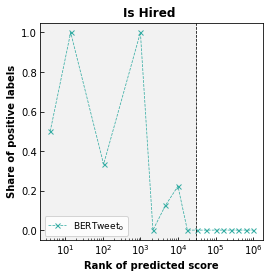

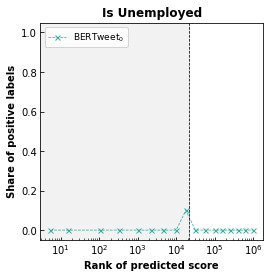

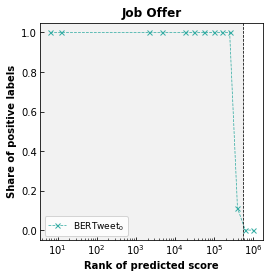

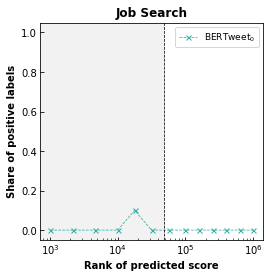

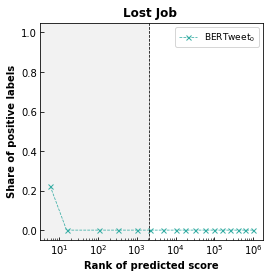

In [36]:
country_code='US'
model_folder = 'iter_0-convbert-969622-evaluation'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = discard_tweets_without_keywords(df).reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}_without_keywords.png'),bbox_inches='tight')

### BERTweet

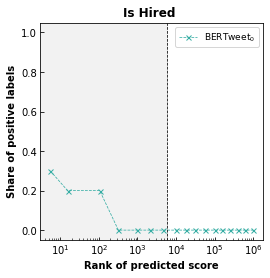

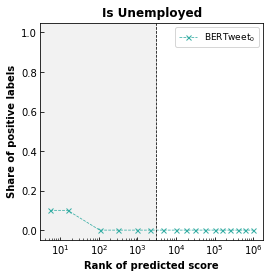

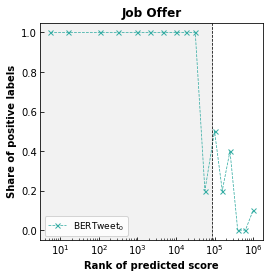

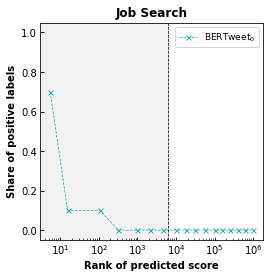

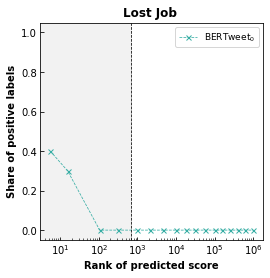

In [8]:
country_code='US'
model_folder = 'iter_0-test4-944677-evaluation'
base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{model_folder}/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    df = df[['rank', 'point', 'class']]
    average_df = df.groupby(df.point).mean()
    average_df.columns = ['rank', 'share_positives']
    models=['BERT', 'GloVe']
    model='BERT'
    iteration=0
    name='iteration_'+str(iteration)+'-'+model+'-'+label
    #df[name].groupby('index_rank')[['rank','label']].mean().plot(
    average_df.plot(
    y='share_positives',
    x='rank',
    ax=ax,
    linewidth=.75,
    color=sns.color_palette("husl", len(models))[1],
    style=['--','-'][0],
    marker='x',
    markersize=5,
    label=f'BERTweet$_{str(0)}$')
    ax.axvline(label2rank[label],linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, label2rank[label], alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight')

In [131]:
for label in labels:
    print(label)
    path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_inference/US/{label}.csv"
    df = pd.read_csv(path_to_data)
    df = df.sort_values(by='rank').reset_index(drop=True)
    print(df['text'].head(n=20))

is_hired_1mo
0     Started my new job today, &amp;i realllly like it!
1     Ayyye i just got a new job                        
2     Ayyyyy just got a new job                         
3     Thank God I got a new job!                        
4     FINALLYYYYY GOT A NEW JOB                         
5     Just got this new job                             
6     So just got a new job                             
7     Today I got a job at Chickfila                    
8     Got a new job, AGAIN ☺                            
9     Ya girl got a new job 🤩                           
10    My dad got a new job!                             
11    I got a new job! Lord I’m happy!                  
12    Finally I got a new job!                          
13    This girl just got a job :)                       
14    Yay, I got a jobbish                              
15    Started my new job today. I actually like it.     
16    YOUR GIRL JUST GOT A NEW JOB 🙌🌍😩                  
17    YAY! I got a

### Mexico

In [4]:
color_dict = {0:'darkgreen', 1: 'darkblue', 2:'maroon', 
              3:'red', 4:'gold', 5: 'lime', 6: 'aqua', 7: 'cornflowerblue', 8: 'peachpuff', 9:'orangered',
              10: 'palegoldenrod', 11: 'darkorange', 12: 'fuchsia'}

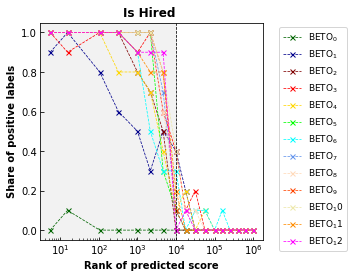

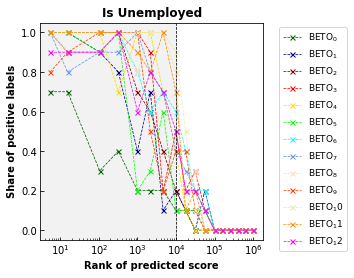

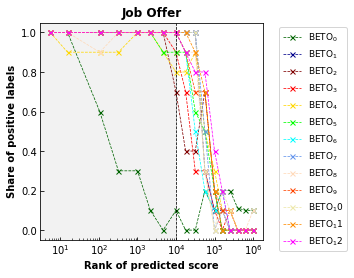

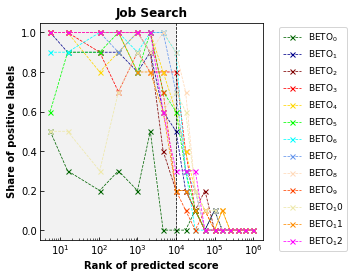

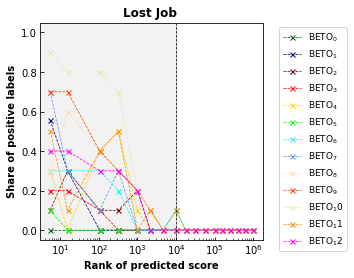

In [5]:
country_code='MX'
model_folder_dict = {'iteration_0': 'iter_0-beto-3201262-evaluation',
                     'iteration_1': 'iter_1-beto-3741011-evaluation',
                     'iteration_2': 'iter_2-beto-4141605-evaluation',
                     'iteration_3': 'iter_3-beto-4379208-evaluation',
                     'iteration_4': 'iter_4-beto-4608158-evaluation',
                     'iteration_5': 'iter_5-beto-6886543-evaluation',
                     'iteration_6': 'iter_6-beto-7130854-evaluation',
                     'iteration_7': 'iter_7-beto-7298603-evaluation',
                     'iteration_8': 'iter_8-beto-7390703-evaluation',
                     'iteration_9': 'iter_9-beto-7409624-evaluation',
                     'iteration_10': 'iter_10-beto-8229596-evaluation',
                     'iteration_11': 'iter_11-beto-8810554-evaluation',
                     'iteration_12': 'iter_12-beto-8968182-evaluation'
                     }
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(13):
            model_folder = model_folder_dict[f'iteration_{str(iteration)}']
            path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/MX/{model_folder}/{label}.csv"
            df = pd.read_csv(path_to_data, usecols=['rank', 'point', 'class'])
            df = df.sort_values(by='rank').reset_index(drop=True)
            df = df[['rank', 'point', 'class']]
            average_df = df.groupby(df.point).mean()
            average_df.columns = ['rank', 'share_positives']
            #models=['BERT', 'GloVe']
            model='BERT'
            name='iteration_'+str(iteration)+'-'+model+'-'+label
            #df[name].groupby('index_rank')[['rank','label']].mean().plot(
            average_df.plot(
            y='share_positives',
            x='rank',
            ax=ax,
            linewidth=.75,
            color=color_dict[iteration],
    #         color=sns.color_palette("husl", 4)[iteration-1],
            style=['--','-'][0],
            marker='x',
            markersize=5,
            label=f'BETO$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend( bbox_to_anchor=(1.05, 1),fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

In [9]:
print(f'BETO_${10}$')

BETO_$10$


## BR

In [4]:
color_dict = {0:'darkgreen', 1: 'darkblue', 2:'maroon', 
              3:'red', 4:'gold', 5: 'lime', 6: 'aqua', 7: 'cornflowerblue', 8: 'peachpuff', 9:'fuchsia'}

is_hired_1mo
0
1
2
3
4
5
6
7
8
9
is_unemployed
0
1
2
3
4
5
6
7
8
9
job_offer
0
1
2
3
4
5
6
7
8
9
job_search
0
1
2
3
4
5
6
7
8
9
lost_job_1mo
0
1
2
3
4
5
6
7
8
9


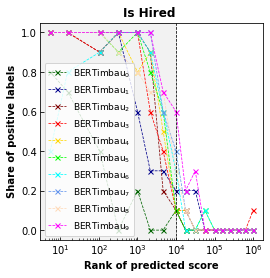

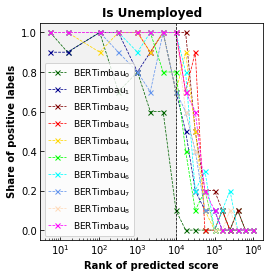

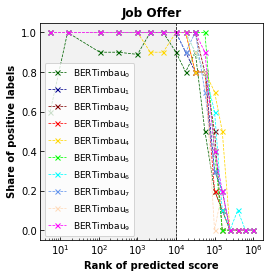

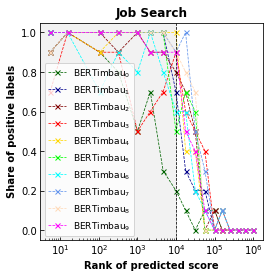

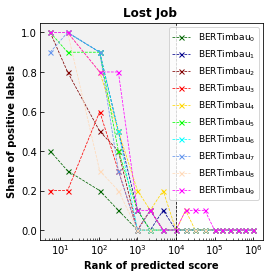

In [8]:
country_code='BR'
model_folder_dict = {'iteration_0': 'iter_0-bertimbau-2877651-evaluation',
                     'iteration_1': 'iter_1-bertimbau-3774133-evaluation',
                     'iteration_2': 'iter_2-bertimbau-4180985-evaluation',
                     'iteration_3': 'iter_3-bertimbau-4518774-evaluation',
                     'iteration_4': 'iter_4-bertimbau-4688729-evaluation',
                     'iteration_5': 'iter_5-bertimbau-6899149-evaluation',
                     'iteration_6': 'iter_6-bertimbau-7056174-evaluation',
                     'iteration_7': 'iter_7-bertimbau-7270172-evaluation',
                     'iteration_8': 'iter_8-bertimbau-7450188-evaluation',
                     'iteration_9': 'iter_9-bertimbau-8073220-evaluation'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
for label in labels:
    print(label)
    fig,ax = plt.subplots(figsize=(4,4))
    for iteration in range(10):
        print(iteration)
        model_folder = model_folder_dict[f'iteration_{str(iteration)}']
        path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/BR/{model_folder}/{label}.csv"
        df = pd.read_csv(path_to_data, usecols=['rank', 'point', 'class'])
        df = df.sort_values(by='rank').reset_index(drop=True)
        df = df[['rank', 'point', 'class']]
        average_df = df.groupby(df.point).mean()
        average_df.columns = ['rank', 'share_positives']
        #models=['BERT', 'GloVe']
        model='BERT'
        name='iteration_'+str(iteration)+'-'+model+'-'+label
        #df[name].groupby('index_rank')[['rank','label']].mean().plot(
        average_df.plot(
        y='share_positives',
        x='rank',
        ax=ax,
        linewidth=.75,
        color=color_dict[iteration],
#         color=sns.color_palette("husl", 4)[iteration-1],
        style=['--','-'][0],
        marker='x',
        markersize=5,
        label=f'BERTimbau$_{str(iteration)}$')
    ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
    ax.set_xscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Share of positive labels',fontweight='bold')
    ax.set_xlabel('Rank of predicted score',fontweight='bold')
    ax.axvspan(0, 10000, alpha=0.1, color='grey')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### Combined

In [8]:
import matplotlib.gridspec as gridspec

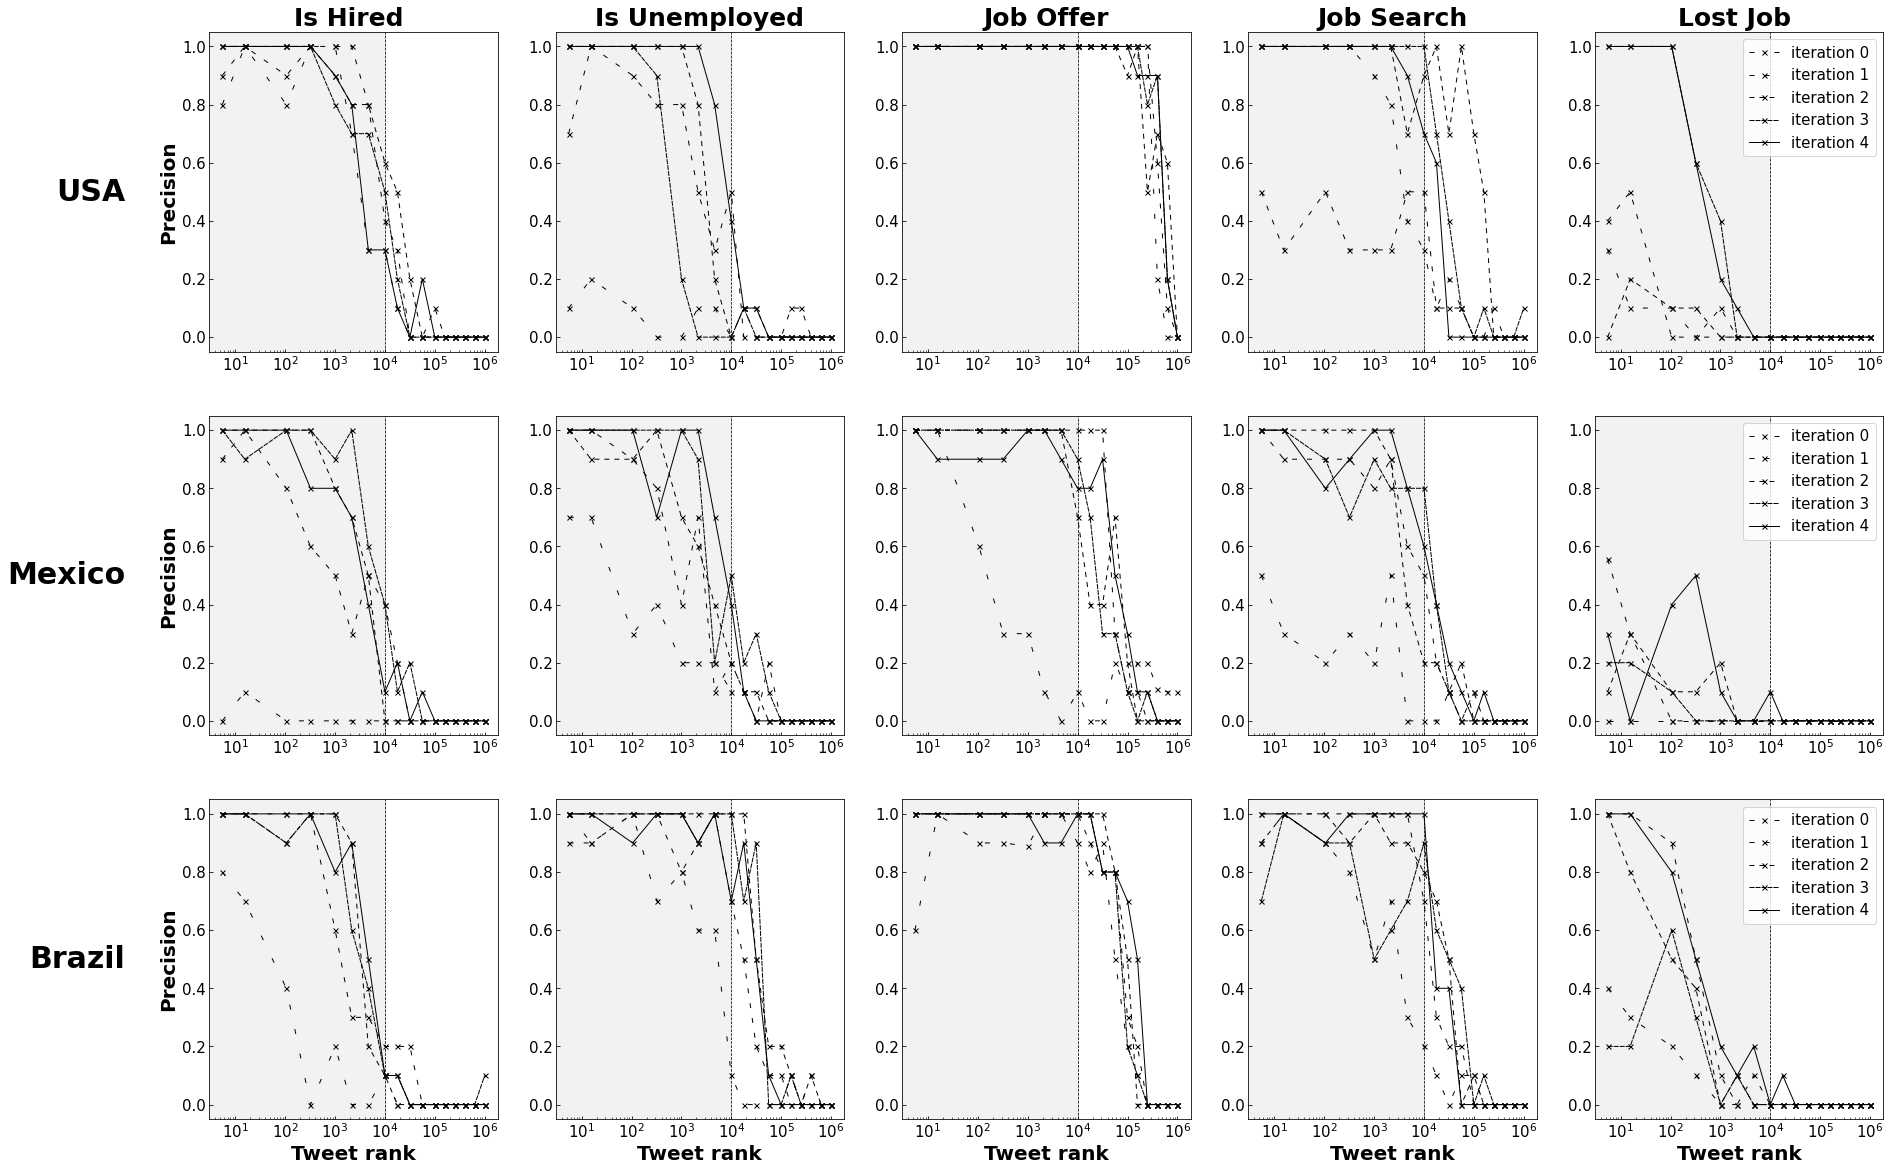

In [33]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']
model_folder_dict = { 'US': {'iteration_0': 'iter_0-convbert-969622-evaluation',
                     'iteration_1': 'iter_1-convbert_adaptive-5612019-evaluation',
                     'iteration_2': 'iter_2-convbert_adaptive-5972342-evaluation',
                     'iteration_3': 'iter_3-convbert_adaptive-5998181-evaluation',
                     'iteration_4': 'iter_4-convbert_adaptive-6057405-evaluation'},
                        'BR':{'iteration_0': 'iter_0-bertimbau-2877651-evaluation',
                     'iteration_1': 'iter_1-bertimbau-3774133-evaluation',
                     'iteration_2': 'iter_2-bertimbau-4180985-evaluation',
                     'iteration_3': 'iter_3-bertimbau-4518774-evaluation',
                     'iteration_4': 'iter_4-bertimbau-4688729-evaluation'},
                      'MX': {'iteration_0': 'iter_0-beto-3201262-evaluation',
                     'iteration_1': 'iter_1-beto-3741011-evaluation',
                     'iteration_2': 'iter_2-beto-4141605-evaluation',
                     'iteration_3': 'iter_3-beto-4379208-evaluation',
                     'iteration_4': 'iter_4-beto-4608158-evaluation'}}
pad = 30
# loosely dashdotdotted
# dashdotdotted
# loosely dashed
# 
linestyle_dict={0: (0, (5, 20)), 
                1: (0, (5, 10)), 
                2: (0, (5, 5)), 
                3: (0, (5, 1)), 
                4: 'solid'}
# base_ranks=[int(x*N_random[country_code]) for x in base_rates[country_code]]
# label2rank=dict(zip(labels,base_ranks))
fig_total = plt.figure(figsize=(30,20))
gs = gridspec.GridSpec(3, 5, figure=fig_total)
annotate_dict = {'US': 'USA', 'MX': 'Mexico', 'BR': 'Brazil' }
for num_country, country_code in enumerate(['US','MX', 'BR']):
    for num, label_class in enumerate(labels):
        ax = fig_total.add_subplot(gs[num_country, num])
        for iteration in range(5):
            model_folder = model_folder_dict[country_code][f'iteration_{str(iteration)}']
            path_to_data = f"/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/{country_code}/{model_folder}/{label_class}.csv"
            df = pd.read_csv(path_to_data, usecols=['rank', 'point', 'class'])
            df = df.sort_values(by='rank').reset_index(drop=True)
            df = df[['rank', 'point', 'class']]
            average_df = df.groupby(df.point).mean()
            average_df.columns = ['rank', 'share_positives']
            #models=['BERT', 'GloVe']
            model='BERT'
            name='iteration_'+str(iteration)+'-'+model+'-'+label_class
            #df[name].groupby('index_rank')[['rank','label']].mean().plot(
            average_df.plot(
            y='share_positives',
            x='rank',
            ax=ax,
            linewidth=1,
            color='black',
            linestyle=linestyle_dict[iteration],
            marker='x',
            markersize=5,
            label=f'iteration {str(iteration)}',
            alpha=1)
        ax.axvline(10000,linewidth=.75,color='k',linestyle='--')
        ax.set_xscale('log')
        ax.tick_params(which='both',direction='in',pad=3)
        for x_label in ax.get_xticklabels():
            x_label.set_fontsize(15)
        for y_label in ax.get_yticklabels():
            y_label.set_fontsize(15)
        ax.locator_params(axis='y',nbins=6)
        if num == 0:
            ax.set_ylabel('Precision',fontweight='bold', fontsize=20)
            ax.annotate(annotate_dict[country_code], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', fontsize=30, fontweight='bold')
        if num_country == 2:
            ax.set_xlabel('Tweet rank',fontweight='bold', fontsize=20)
        else:
            ax.set_xlabel('')
        ax.axvspan(0, 10000, alpha=0.1, color='grey')
        if num_country==0:
            ax.set_title(label_class.replace('_',' ').replace('1mo','').title(),fontweight='bold', fontsize=25)
#         handles, labels_graph = ax.get_legend_handles_labels()
        if num == 4:
            ax.legend(loc='upper right',fontsize=15)
        else:
            ax.get_legend().remove()
        ax.set_ylim([-0.05,1.05])
        #plt.savefig(os.path.join(os.path.dirname(path_to_data),f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)
# fig_total.legend(handles, labels_graph, loc='center right')
# plt.show()
plt.savefig('/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/fig/final_plots/country_comparison.png',bbox_inches='tight', format='png' ,dpi=300, transparent=False)